In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from analysis import bender_class
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import seaborn
seaborn.set(font='Arial',context='talk',font_scale=1.0, style='white')

In [4]:
# Specify the curve fit type, 1 for linear, 2 for quadratic.  
degree = 2

In [86]:
DS1 = os.path.join(path_to_repository , "CSV Data/5_22_25/2.1_static_v1_silpoxy_5_22_25.csv")
DS2 = os.path.join(path_to_repository , "CSV Data/5_23_25/2.1_static_v1_silpoxy_sam2_5_23_25.csv")


['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_22_25/2.1_static_v1_silpoxy_5_22_25.csv']
ADC normalized with initial value R₀: 0.0017361552346570395
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_23_25/2.1_static_v1_silpoxy_sam2_5_23_25.csv']
ADC normalized with initial value R₀: 0.001663586040914561


<Axes: title={'center': 'Experimental vs Theoretical Model'}, xlabel='Strain (ε)', ylabel='Normalized ADC (ΔR / R₀)'>

C:\Users\toppe\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\toppe\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


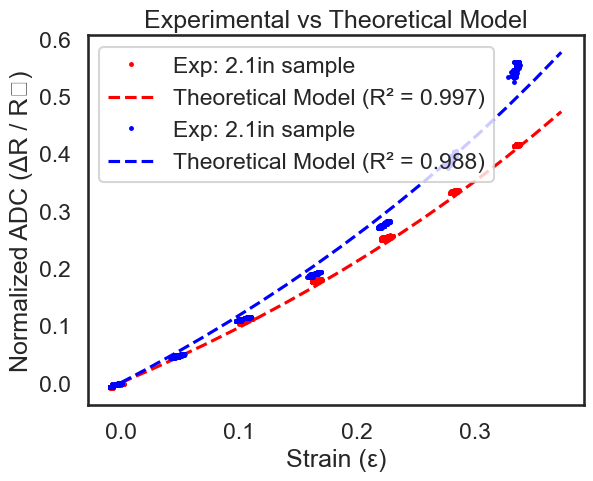

In [92]:
# Import matplotlib to ensure plotting works
import matplotlib.pyplot as plt



# first model and dataset
g = bender_class()
g.load_data(DS1)
LSB = 35*10**-6 # 2*Vref/(ADC_Gain*2**16)
Gain = 831
g.data['ADC Value'] = (g.data['ADC Value']*LSB + 2.048)/831
g.normalize_adc_over_R0()  


thick = 0.115 + 0.25 + 0.125
l_ch = 3.89
l_sam = 2.1
area = 0.016*0.016 #??????
res = 0.4

# Create a figure and axes before plotting
fig, ax = plt.subplots()  # This explicitly creates the `ax` object

# Create a figure and axes before plotting
g.plot_mech_model_data(1, LSB, thick, l_ch, l_sam, area, res, scatter=False, data_color='red', 
                            model_color='red', data_label='Exp: 2.1in sample', 
                       model_label='Theoretical Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet


# second model and dataset
g = bender_class()
g.load_data(DS2)
LSB = 35*10**-6  # 2*Vref/(ADC_Gain*2**16)
Gain = 64
g.data['ADC Value'] = (g.data['ADC Value'] * LSB + 2.048)/831
g.normalize_adc_over_R0()  


thick = 0.115 + 0.25 + 0.125
l_ch = 3.89
l_sam = 2.1
area = 0.014*0.015 #??????
res = 0.4

# Create a figure and axes before plotting
#fig, ax = plt.subplots()  # This explicitly creates the `ax` object

# Create a figure and axes before plotting
g.plot_mech_model_data(1, LSB, thick, l_ch, l_sam, area, res, scatter=False, data_color='blue', 
                            model_color='blue', data_label='Exp: 2.1in sample', 
                       model_label='Theoretical Model', normalize_by='over_R0', ax=ax) # get this info from spreadsheet


